> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Firearms USA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [487]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('mode.chained_assignment', None)

## Helper Functions

In [488]:
# Dropping columns with more than number_NaNs NaN values
def DropColumns(df, number_nans):
    columns_to_drop = []
    for column in df.columns:
        if (df[column].isna().sum()>number_nans) == True:
            columns_to_drop.append(column)
    df_no_nans = df.drop(columns=columns_to_drop)
    return df_no_nans

# Brings last column in df to be the first
def BeginWithLast(df):
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df

# Gets the length of years mentioned in the column
def getLengthYearValues(x):
    return len(list(set(re.findall(r'[0-9]{4}', x))))

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [489]:
gun_df = pd.read_csv('FirearmsUSA2020.csv')
census_df = pd.read_csv('U.S. Census Data.csv')

In [490]:
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-07,Alabama,48126.0,682.0,34909.0,17250.0,2498.0,1170,0.0,33.0,...,0.0,0.0,0.0,43.0,23.0,10.0,1.0,2.0,0.0,107490
1,2020-07,Alaska,69.0,152.0,4949.0,3779.0,435.0,283,0.0,0.0,...,0.0,0.0,0.0,14.0,6.0,2.0,0.0,0.0,0.0,10108
2,2020-07,Arizona,9402.0,900.0,31040.0,12361.0,2411.0,2866,0.0,7.0,...,1.0,0.0,0.0,23.0,10.0,4.0,0.0,0.0,0.0,60330
3,2020-07,Arkansas,4292.0,847.0,12391.0,7322.0,738.0,432,3.0,12.0,...,0.0,0.0,0.0,19.0,16.0,0.0,1.0,0.0,0.0,27647
4,2020-07,California,35097.0,0.0,67672.0,38618.0,7530.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149685


In [491]:
print('Number of rows is ' + str(gun_df.shape[0]) + ', while the number of columns is ' + str(gun_df.shape[1]) + '.')

Number of rows is 14355, while the number of columns is 27.


In [492]:
# dataset's columns
gun_df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [493]:
# Number of NaN values in each column
gun_df.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

There are around 14 thousands rows in this dataset, there are many columns that have even more than 10 thousands NaNs. Columns with thousands NaNs don't carry any useful information. They will be dropped later on in this notebook.

In [494]:
gun_df.isna().sum()>1000

month                        False
state                        False
permit                       False
permit_recheck                True
handgun                      False
long_gun                     False
other                         True
multiple                     False
admin                        False
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [495]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14355 entries, 0 to 14354
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14355 non-null  object 
 1   state                      14355 non-null  object 
 2   permit                     14331 non-null  float64
 3   permit_recheck             2970 non-null   float64
 4   handgun                    14335 non-null  float64
 5   long_gun                   14336 non-null  float64
 6   other                      7370 non-null   float64
 7   multiple                   14355 non-null  int64  
 8   admin                      14332 non-null  float64
 9   prepawn_handgun            12412 non-null  float64
 10  prepawn_long_gun           12410 non-null  float64
 11  prepawn_other              6985 non-null   float64
 12  redemption_handgun         12415 non-null  float64
 13  redemption_long_gun        12414 non-null  flo

In [496]:
# Checking what the 'totals' attribute represents
no_na_gun_df = gun_df.dropna()
print('Is the summation of all the values in each row except for the "totals" equal to the "totals" fields?\n', 
      not (False in (no_na_gun_df.drop(columns=['month', 'state', 'totals']).sum(axis=1)\
            .apply(lambda x: int(x)) == no_na_gun_df['totals']).values))

Is the summation of all the values in each row except for the "totals" equal to the "totals" fields?
 True


The left hand side of the '==' is the summation of all the fields (except 'totals') of each row, the right hand side of it is the values of the 'totals' attribute.

In [497]:
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [498]:
print('Number of rows is ' + str(census_df.shape[0]) + ', while the number of columns is ' + str(census_df.shape[1]) + '.')

Number of rows is 85, while the number of columns is 52.


In [499]:
census_df.isna().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

Probably, the 20 NaNs in all the states are from the same rows.

In [500]:
# Checking if the 20 NaNs in all the states are from the same rows
print('Number of rows in this dataset is ' + str(len(census_df)) + '.')
census_df.drop(columns=['Fact', 'Fact Note']).dropna()

Number of rows in this dataset is 85.


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756","96,787",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686","800,585",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,168.4,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76","57,513.49",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


In [501]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

* Since the number of rows is 85, and the number of rows after dropping NaN values is 65, then all the 20 NaN values are from the same  columns.  
*Fact Note column seems to be useless with 57 NaN values, it should be dropped.  
* The Fact column has important information, more columns can be generated like the meaning of the values in the states' columns, date, and time.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning gun_df

In [502]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [503]:
gun_df = DropColumns(gun_df, 1000)
gun_df

,month,state,permit,handgun,long_gun,multiple,admin,totals
0,2020-07,Alabama,48126.0,34909.0,17250.0,1170,0.0,107490
1,2020-07,Alaska,69.0,4949.0,3779.0,283,0.0,10108
2,2020-07,Arizona,9402.0,31040.0,12361.0,2866,0.0,60330
3,2020-07,Arkansas,4292.0,12391.0,7322.0,432,3.0,27647
4,2020-07,California,35097.0,67672.0,38618.0,0,0.0,149685
...,...,...,...,...,...,...,...,...
14350,1998-11,Virginia,0.0,14.0,2.0,8,0.0,24
14351,1998-11,Washington,1.0,65.0,286.0,8,1.0,361
14352,1998-11,West Virginia,3.0,149.0,251.0,5,0.0,408
14353,1998-11,Wisconsin,0.0,25.0,214.0,2,0.0,241


Columns with very high number of missing values are dropped. The next step would be filling NaN values of the remaining columns.

In [504]:
gun_df.isna().sum()

month        0
state        0
permit      24
handgun     20
long_gun    19
multiple     0
admin       23
totals       0
dtype: int64

In [505]:
gun_df[gun_df.permit.isna()]

,month,state,permit,handgun,long_gun,multiple,admin,totals
9149,2006-09,Louisiana,NaN,5948.0,10836.0,253,0.0,19080
9180,2006-09,Virginia,NaN,6935.0,11023.0,242,0.0,18200
9674,2005-12,Virgin Islands,NaN,22.0,1.0,0,NaN,23
9729,2005-11,Virgin Islands,NaN,13.0,2.0,1,NaN,16
9784,2005-10,Virgin Islands,NaN,NaN,NaN,0,NaN,0
9839,2005-09,Virgin Islands,NaN,NaN,NaN,0,NaN,0
9894,2005-08,Virgin Islands,NaN,NaN,NaN,0,NaN,0
9949,2005-07,Virgin Islands,NaN,NaN,NaN,0,NaN,0
10004,2005-06,Virgin Islands,NaN,NaN,NaN,0,NaN,0
10059,2005-05,Virgin Islands,NaN,NaN,NaN,0,NaN,0


Most of the NaN values are from the same rows. They have totals of 0, they seem to be not very intuitive. They should be dropped as well.

In [506]:
gun_df.dropna(inplace=True)

'month' column needs to be separated into years and months columns for more useful insights. A split will be occurred on '-' between the years and months values.

In [507]:
gun_df['year'] = gun_df.month.apply(lambda x: x.split('-')[0])
gun_df['month'] = gun_df.month.apply(lambda x: x.split('-')[1])
gun_df.head(2)

,month,state,permit,handgun,long_gun,multiple,admin,totals,year
0,07,Alabama,48126.0,34909.0,17250.0,1170,0.0,107490,2020
1,07,Alaska,69.0,4949.0,3779.0,283,0.0,10108,2020


The next step is just to make data appealing, year and month columns should be next to each other.

In [508]:
gun_df = BeginWithLast(gun_df)
gun_df.head(2)

,year,month,state,permit,handgun,long_gun,multiple,admin,totals
0,2020,07,Alabama,48126.0,34909.0,17250.0,1170,0.0,107490
1,2020,07,Alaska,69.0,4949.0,3779.0,283,0.0,10108


### Data Cleaning census_df

'Fact Note' column has 57 NaN values out of 80, it should be dropped.

In [509]:
census_df.drop(columns='Fact Note', inplace=True)

Dropping NaN rows

In [510]:
census_df.dropna(inplace=True)

Most of Fact's rows have years values, some of them have just one value, and others have two values. The one value represents observations for each state at that year, while the two values represent growth through time frame in years.  
That's why the census_df will be split into 3 smaller dataframes.

In [511]:
census_0y_df = census_df[(census_df.Fact.apply(lambda x: getLengthYearValues(x))<1)]
census_0y_df

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
37,"Persons without health insurance, under age 6...",10.70%,15.50%,11.90%,9.30%,8.30%,8.60%,5.70%,6.60%,15.30%,...,0.103,0.106,18.60%,9.70%,4.50%,10.10%,6.90%,6.50%,6.20%,13.40%
49,"Persons in poverty, percent",17.10%,9.90%,16.40%,17.20%,14.30%,11.00%,9.80%,11.70%,14.70%,...,0.133,0.158,15.60%,10.20%,11.90%,11.00%,11.30%,17.90%,11.80%,11.30%
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [512]:
census_1y_df = census_df[(census_df.Fact.apply(lambda x: getLengthYearValues(x))==1)]
census_1y_df

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%
10,"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
11,"Female persons, percent, April 1, 2010",51.50%,48.00%,50.30%,50.90%,50.30%,49.90%,51.30%,51.60%,51.10%,...,0.5,0.513,50.40%,49.80%,50.70%,50.90%,50.20%,50.70%,50.40%,49.00%


In [513]:
census_2y_df = census_df[(census_df.Fact.apply(lambda x: getLengthYearValues(x))==2)]
census_2y_df

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
20,"Veterans, 2011-2015","363,170","69,323","505,794","220,953","1,777,410","391,725","199,331","71,213","1,507,738",...,63742,462414,"1,539,655","134,332","44,708","706,539","564,864","150,021","381,940","48,505"
21,"Foreign born persons, percent, 2011-2015",3.50%,7.40%,13.50%,4.70%,27.00%,9.80%,13.90%,8.70%,19.70%,...,0.03,0.048,16.60%,8.40%,4.30%,11.70%,13.40%,1.50%,4.80%,3.60%
24,"Owner-occupied housing unit rate, 2011-2015",68.70%,63.40%,62.80%,66.10%,54.30%,64.30%,67.00%,71.20%,65.30%,...,0.681,0.668,62.20%,69.50%,71.00%,66.20%,62.50%,72.50%,67.30%,69.10%
25,"Median value of owner-occupied housing units, ...","$125,500","$250,000","$167,500","$111,400","$385,500","$247,800","$270,500","$231,500","$159,000",...,140500,142100,"$136,000","$215,900","$217,500","$245,000","$259,500","$103,800","$165,800","$194,800"
26,Median selected monthly owner costs -with a mo...,"$1,139","$1,827","$1,343","$1,019","$2,155","$1,577","$2,067","$1,537","$1,435",...,1210,1181,"$1,432","$1,428","$1,535","$1,711","$1,731",$966,"$1,402","$1,348"
27,Median selected monthly owner costs -without a...,$345,$554,$380,$327,$500,$419,$833,$445,$463,...,433,359,$460,$388,$641,$433,$511,$293,$532,$386
28,"Median gross rent, 2011-2015",$717,"$1,146",$913,$677,"$1,255","$1,002","$1,075","$1,018","$1,002",...,655,764,$882,$887,$895,"$1,116","$1,014",$643,$776,$789
30,"Households, 2011-2015","1,848,325","250,969","2,412,212","1,138,025","12,717,801","2,024,468","1,352,583","344,022","7,300,494",...,330858,2504556,"9,149,196","906,292","257,167","3,062,783","2,668,912","740,890","2,299,107","226,865"


Fixing census_0y_df

In [514]:
float('17.10')

17.1

In [515]:
census_0y_df.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
37,"Persons without health insurance, under age 6...",10.70%,15.50%,11.90%,9.30%,8.30%,8.60%,5.70%,6.60%,15.30%,...,0.103,0.106,18.60%,9.70%,4.50%,10.10%,6.90%,6.50%,6.20%,13.40%
49,"Persons in poverty, percent",17.10%,9.90%,16.40%,17.20%,14.30%,11.00%,9.80%,11.70%,14.70%,...,0.133,0.158,15.60%,10.20%,11.90%,11.00%,11.30%,17.90%,11.80%,11.30%
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [516]:
# removing commas and percent signs, and coverting them into float
census_0y_df[census_0y_df.columns[1:]] = census_0y_df[census_0y_df.columns[1:]]\
                                         .replace({',':'', '%':'', '"':''}, regex=True)\
                                         .replace('', np.nan)

states = census_0y_df.columns[1:]
for state in states:
    census_0y_df[state] = census_0y_df[state].astype(float)

census_0y_df.dtypes

Fact               object
Alabama           float64
Alaska            float64
Arizona           float64
Arkansas          float64
California        float64
Colorado          float64
Connecticut       float64
Delaware          float64
Florida           float64
Georgia           float64
Hawaii            float64
Idaho             float64
Illinois          float64
Indiana           float64
Iowa              float64
Kansas            float64
Kentucky          float64
Louisiana         float64
Maine             float64
Maryland          float64
Massachusetts     float64
Michigan          float64
Minnesota         float64
Mississippi       float64
Missouri          float64
Montana           float64
Nebraska          float64
Nevada            float64
New Hampshire     float64
New Jersey        float64
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma          float64
Oregon            float64
Pennsylvania

Fixing census_1y_df

In [517]:
census_1y_df['Year'] = census_1y_df.Fact.apply(lambda x: re.findall(r'[0-9]{4}', x)[0])
census_1y_df.head(2)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501",2016
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626",2010


In [518]:
# moving Year column to be in the start
census_1y_df = BeginWithLast(census_1y_df)
census_1y_df.head(2)

,Year,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2016,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
3,2010,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


In [519]:
# having only the valuable information in Fact column
census_1y_df['Fact'] = census_1y_df.Fact.apply(lambda x: x.split(',')[0])
census_1y_df.head(2)

,Year,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2016,Population estimates,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
3,2010,Population,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


In [520]:
# removing commas and percent signs, and coverting them into float
census_1y_df[census_1y_df.columns[2:]] = census_1y_df[census_1y_df.columns[2:]]\
                                         .replace({',':'', '%':'', '\$':'', '[a-zA-Z]':''}, regex=True)\
                                         .replace({'':np.nan})

states = census_1y_df.columns[2:]

for state in states:
    census_1y_df[state] = census_1y_df[state].astype(float)

census_1y_df.dtypes

Year               object
Fact               object
Alabama           float64
Alaska            float64
Arizona           float64
Arkansas          float64
California        float64
Colorado          float64
Connecticut       float64
Delaware          float64
Florida           float64
Georgia           float64
Hawaii            float64
Idaho             float64
Illinois          float64
Indiana           float64
Iowa              float64
Kansas            float64
Kentucky          float64
Louisiana         float64
Maine             float64
Maryland          float64
Massachusetts     float64
Michigan          float64
Minnesota         float64
Mississippi       float64
Missouri          float64
Montana           float64
Nebraska          float64
Nevada            float64
New Hampshire     float64
New Jersey        float64
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma          float64
Oregon      

Fixing census_2y_df

In [521]:
# having starting and ending years to the corresponding values
census_2y_df['StartYear'] = census_2y_df.Fact.apply(lambda x: re.findall(r'[0-9]{4}', x)[0])
census_2y_df['EndYear'] = census_2y_df.Fact.apply(lambda x: re.findall(r'[0-9]{4}', x)[1])

census_2y_df = BeginWithLast(census_2y_df)
census_2y_df = BeginWithLast(census_2y_df)

census_2y_df.head(2)

,StartYear,EndYear,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,2010,2016,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,2010,2016,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [522]:
# having only the valuable information in Fact column
census_2y_df['Fact'] = census_2y_df.Fact.apply(lambda x: x.split(',')[0])
census_2y_df.head(2)

,StartYear,EndYear,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,2010,2016,Population estimates base,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,2010,2016,Population,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [523]:
# removing commas and percent signs, and coverting them into float
census_2y_df[census_2y_df.columns[3:]] = census_2y_df[census_2y_df.columns[3:]]\
                                         .replace({',':'', '%':'', '\$':'', '\D':''}, regex=True)\
                                         .replace({'':np.nan})

states = census_2y_df.columns[3:]

for state in states:
    census_2y_df[state] = census_2y_df[state].astype(float)

census_2y_df.dtypes

StartYear          object
EndYear            object
Fact               object
Alabama           float64
Alaska            float64
Arizona           float64
Arkansas          float64
California        float64
Colorado          float64
Connecticut       float64
Delaware          float64
Florida           float64
Georgia           float64
Hawaii            float64
Idaho             float64
Illinois          float64
Indiana           float64
Iowa              float64
Kansas            float64
Kentucky          float64
Louisiana         float64
Maine             float64
Maryland          float64
Massachusetts     float64
Michigan          float64
Minnesota         float64
Mississippi       float64
Missouri          float64
Montana           float64
Nebraska          float64
Nevada            float64
New Hampshire     float64
New Jersey        float64
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma    

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

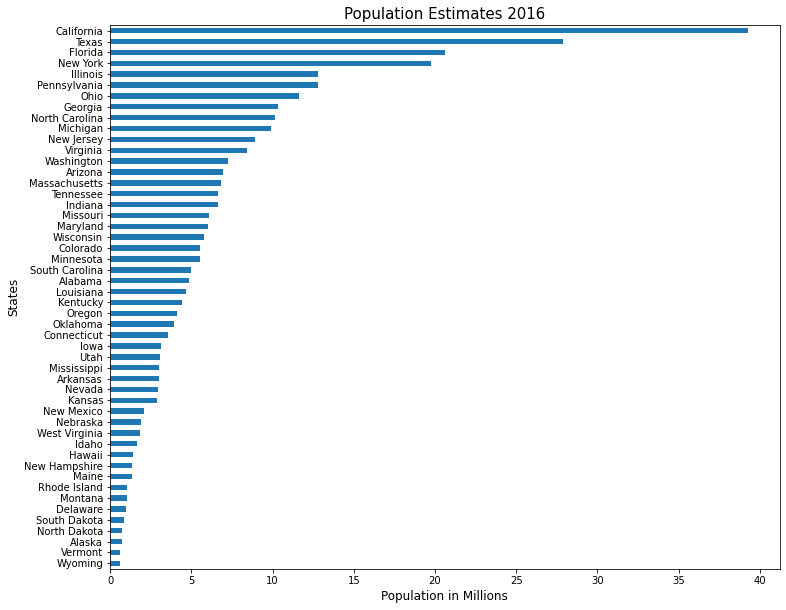

In [524]:
# row with index 0 is the row for population estimates
((census_1y_df[census_1y_df.columns[2:]].loc[0])/1000000).sort_values(ascending=True)\
.plot(x=states, kind='barh', figsize=(12, 10), stacked=True);
plt.xlabel('Population in Millions', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('Population Estimates 2016', fontsize=15)
plt.show()

From the horizontal bar chart, we can conclude that based on the Population Estimates in 2016 that California has the largest population of around 40 millions people, Texas comes second in place, and so on, to a point that some states have less than 1 million people like Wyoming, Vermont, and Alaska.

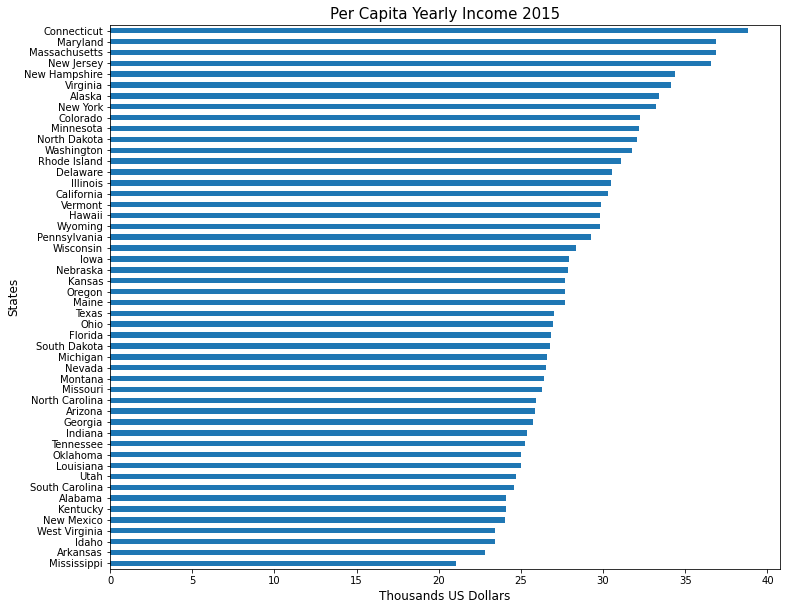

In [525]:
# row with index 48 is the row for per capita income for a year
((census_2y_df[census_2y_df.columns[3:]].loc[48])/1000).sort_values(ascending=True)\
.plot(kind='barh', figsize=(12, 10));
plt.xlabel('Thousands US Dollars', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('Per Capita Yearly Income 2015', fontsize=15)
plt.show()

There is around US$15,000 difference between the highest state and lowest state in yearly income. Having that number alone is not enough to give a judgment on how things are in the states, but as an indication, it works fine.

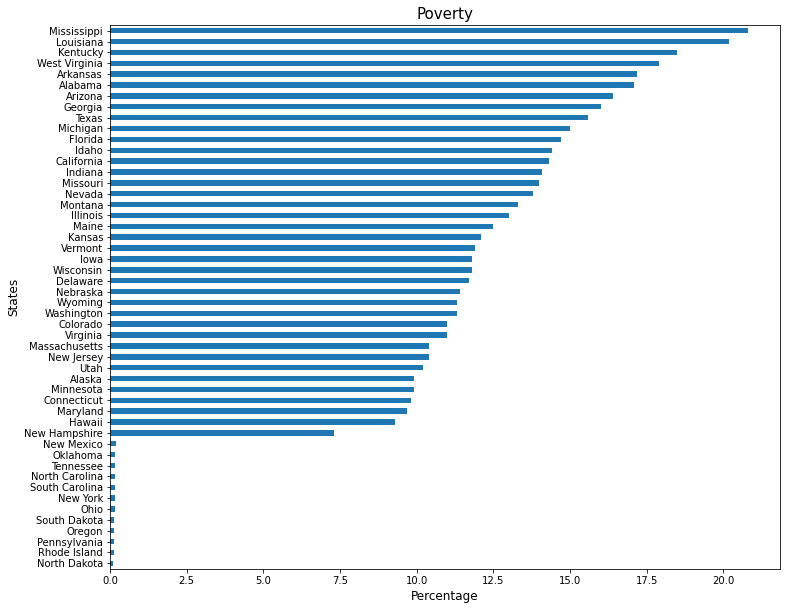

In [530]:
# row with index 49 is the row for percentage of poverty
(census_0y_df[census_0y_df.columns[1:]].loc[49]).sort_values(ascending=True)\
.plot(kind='barh', figsize=(12, 10));
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('Poverty', fontsize=15)
plt.show()

There is a huge difference between states in terms of poverty percentage.

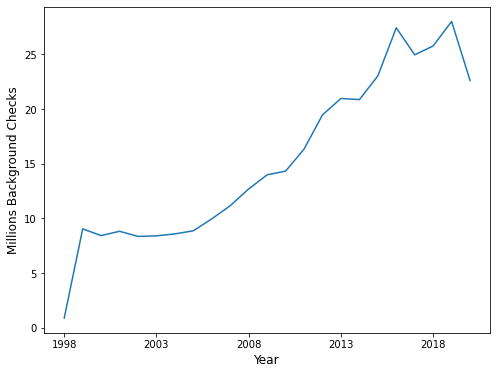

In [566]:
(gun_df.groupby('year').totals.sum()/(10**6)).plot(kind='line', figsize=(8, 6));
plt.xlabel('Year', fontsize=12)
plt.ylabel('Millions Background Checks', fontsize=12)
plt.show()

Background Checks is increasing through the time.

### Research Question 1: What census data is most associated with high gun per capita?

In order to get the gun per capita, totals column of states (as they are ordered alphabetically) should be divided by the population estimates column of same states. Only one year 2015 will be taken as a sample from gun_df.

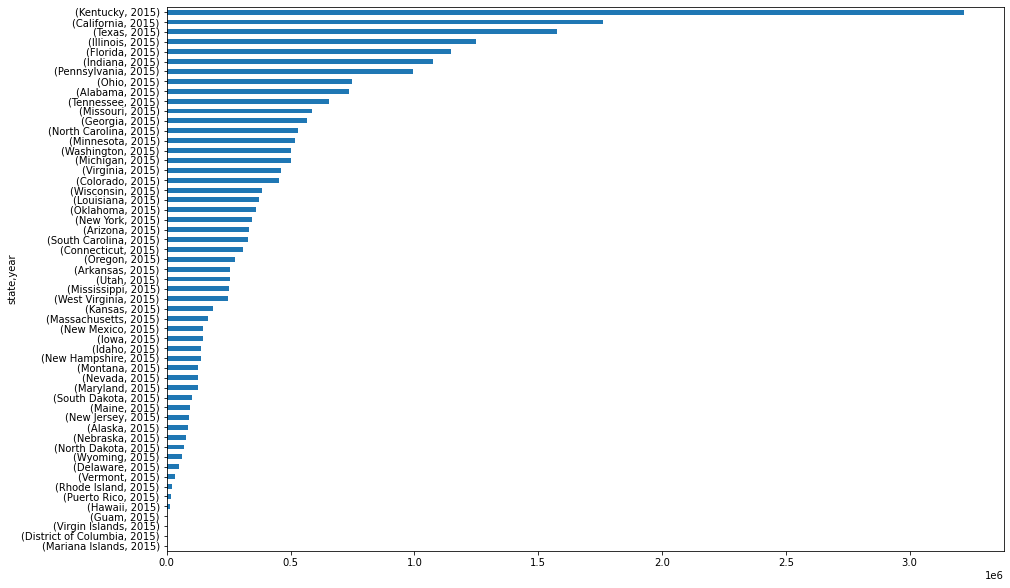

In [570]:
gun_df[gun_df.year=='2015'].groupby(['state', 'year']).totals.sum()\
.sort_values(ascending=True).plot(kind='barh', figsize=(15, 10))

In [543]:
gun_df[gun_df.state=='Alabama'][gun_df.year.isin([str(year) for year in range(1998, 2016)])]

<ipython-input-543-2bb5d9bc37fb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gun_df[gun_df.state=='Alabama'][gun_df.year.isin([str(year) for year in range(1998, 2016)])]


,year,month,state,permit,handgun,long_gun,multiple,admin,totals
3025,2015,12,Alabama,31359.0,47605.0,33710.0,1752,0.0,120914
3080,2015,11,Alabama,18870.0,23022.0,22650.0,1178,0.0,71137
3135,2015,10,Alabama,21958.0,17810.0,14789.0,903,0.0,61156
3190,2015,09,Alabama,20999.0,16038.0,13392.0,819,0.0,56228
3245,2015,08,Alabama,25643.0,17991.0,13613.0,896,0.0,62770
...,...,...,...,...,...,...,...,...,...
14080,1999,03,Alabama,0.0,9151.0,9991.0,282,0.0,19424
14135,1999,02,Alabama,0.0,9630.0,10654.0,299,0.0,20583
14190,1999,01,Alabama,0.0,7516.0,10311.0,222,0.0,18049
14245,1998,12,Alabama,0.0,10118.0,25120.0,268,0.0,35506


In [ ]:
gun_df[gun_df.state=='Alabama'][gun_df.year.isin([str(year) for year in range(1998, 2016)])]

In [531]:
census_1y_df[census_1y_df.columns[2:]].loc[0]

Alabama            4863300.0
Alaska              741894.0
Arizona            6931071.0
Arkansas           2988248.0
California        39250017.0
Colorado           5540545.0
Connecticut        3576452.0
Delaware            952065.0
Florida           20612439.0
Georgia           10310371.0
Hawaii             1428557.0
Idaho              1683140.0
Illinois          12801539.0
Indiana            6633053.0
Iowa               3134693.0
Kansas             2907289.0
Kentucky           4436974.0
Louisiana          4681666.0
Maine              1331479.0
Maryland           6016447.0
Massachusetts      6811779.0
Michigan           9928300.0
Minnesota          5519952.0
Mississippi        2988726.0
Missouri           6093000.0
Montana            1042520.0
Nebraska           1907116.0
Nevada             2940058.0
New Hampshire      1334795.0
New Jersey         8944469.0
New Mexico         2081015.0
New York          19745289.0
North Carolina    10146788.0
North Dakota        757952.0
Ohio          

### Research Question 2: Which states have had the highest growth in gun registrations?

In [528]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

### Research Question 3: What is the overall trend of gun purchases?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!